In [1]:
from environment import stock
from DQN import DQN, seed_torch
import matplotlib.pyplot as plt
import pandas as pd
from GRU import GRU
import torch

profit=[]

def game_step(observation, step=None, train=True, show_log=False):
    action = RL.choose_action(observation, train)
    observation_, reward, done = env.step(action, show_log=show_log)
    RL.store_transition(observation, action, reward, observation_)
    if step and step > 200 and step % 5 == 0:
        RL.learn()
    return observation_, done


def run(max_round: int):
    step = 0
    for episode in range(max_round):
        observation = env.reset()
        while True:
            observation, done = game_step(observation, step=step)
            if done:
                break
            step += 1
        profit.append(env.total_profit)
        if env.total_profit > env.best_profit:
            env.best_profit = env.total_profit
            env.draw()
        print('epoch:%d, total_profit:%.3f' % (episode+1, env.total_profit))


def BackTest(env: stock, show_log=True):
    observation = env.reset()
    while True:
        observation, done = game_step(
            observation, train=False, show_log=show_log)
        if done:
            break
    profit.append(env.total_profit)
    if env.total_profit > env.best_profit:
        env.best_profit = env.total_profit
        env.draw()
    print('total_profit:%.3f' % (env.total_profit))
    return env


seed_torch()
max_round =2000
file_path = 'data/BCHAIN-MKPRU.csv'
df = pd.read_csv(file_path)
gru = torch.load('gru_bit.pth')
env = stock(df, gru, alpha=0.01, init_money=1000.0)
RL = DQN(env.n_actions, env.n_features, lr=0.001, reward_decay=0.9,
            e_greedy=0.9, replace_target_iter=200, memory_size=5000, batch_size=512)
run(max_round)
env = BackTest(env, show_log=False)
print(env.best_profit)


d:\vs_code_work\ZM\DQN.py:69: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ..\torch\csrc\utils\tensor_new.cpp:201.)
  observation = torch.tensor(observation, dtype=torch.float32).to(device)


epoch:1, total_profit:-806.537
epoch:2, total_profit:-205.869
epoch:3, total_profit:3668.647
epoch:4, total_profit:40731.351
epoch:5, total_profit:46967.202
epoch:6, total_profit:52721.014
epoch:7, total_profit:30473.533
epoch:8, total_profit:35826.433
epoch:9, total_profit:60362.267
epoch:10, total_profit:53594.816
epoch:11, total_profit:45705.309
epoch:12, total_profit:73971.938
epoch:13, total_profit:70142.384
epoch:14, total_profit:68193.165
epoch:15, total_profit:60254.334
epoch:16, total_profit:55784.714
epoch:17, total_profit:48800.228
epoch:18, total_profit:63093.074
epoch:19, total_profit:34774.871
epoch:20, total_profit:38388.367
epoch:21, total_profit:40118.357
epoch:22, total_profit:33521.868
epoch:23, total_profit:30284.689
epoch:24, total_profit:44562.895
epoch:25, total_profit:43110.698
epoch:26, total_profit:55092.364
epoch:27, total_profit:58501.496
epoch:28, total_profit:67343.883
epoch:29, total_profit:100452.894
epoch:30, total_profit:45412.051
epoch:31, total_profi

In [53]:
env.buy_num

6.059069014164913

In [54]:
env.hold_money

1376845.1732306955

In [90]:
run(max_round)

epoch:1, total_profit:342761.912
epoch:2, total_profit:313722.799
epoch:3, total_profit:593280.802
epoch:4, total_profit:261440.406
epoch:5, total_profit:330483.625
epoch:6, total_profit:320177.177
epoch:7, total_profit:284899.313
epoch:8, total_profit:324705.868
epoch:9, total_profit:205926.048
epoch:10, total_profit:188352.794
epoch:11, total_profit:237435.645
epoch:12, total_profit:292813.202
epoch:13, total_profit:455675.661
epoch:14, total_profit:170515.385
epoch:15, total_profit:419959.423
epoch:16, total_profit:347493.267
epoch:17, total_profit:327897.924
epoch:18, total_profit:140798.050
epoch:19, total_profit:423404.433
epoch:20, total_profit:333691.409
epoch:21, total_profit:225571.371
epoch:22, total_profit:163327.352
epoch:23, total_profit:287536.887
epoch:24, total_profit:359126.802
epoch:25, total_profit:525749.511
epoch:26, total_profit:284897.910
epoch:27, total_profit:210899.252
epoch:28, total_profit:188547.002
epoch:29, total_profit:288925.535
epoch:30, total_profit:

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
tmp=np.array(profit)

In [10]:
y=[]
x=[]
for i in range(20):
    s=np.sum(tmp[i*100:i*100+100 ])
    m=s/100
    y.append(m)
    x.append(i*100)

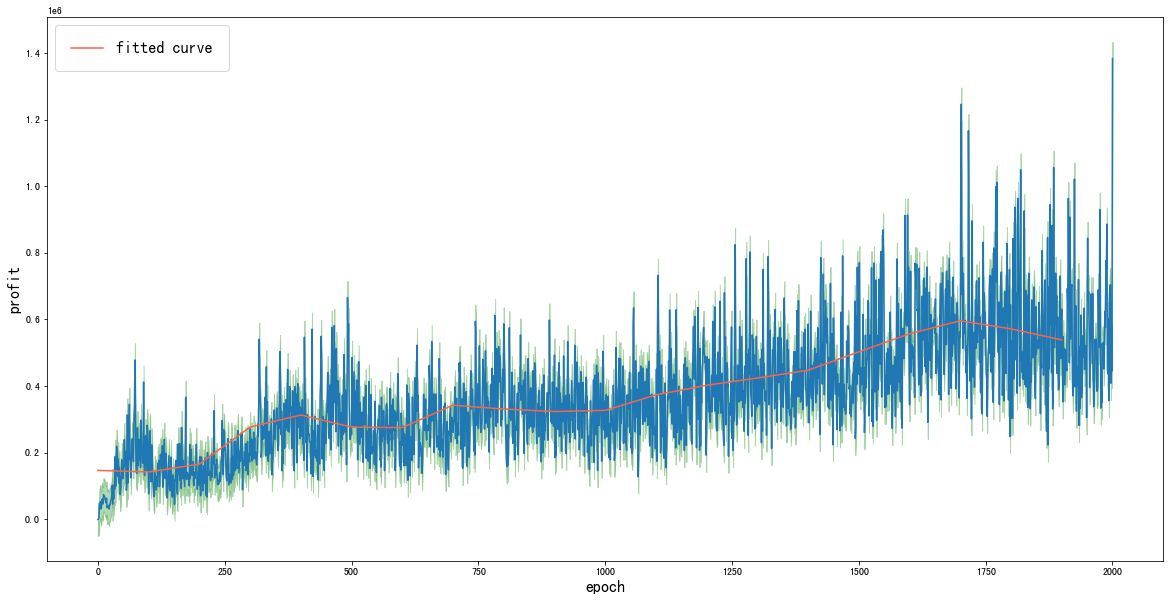

In [11]:
_=plt.figure(figsize=(20,10))
plt.plot(profit)
plt.fill_between(list(range(2001)),tmp-50000,tmp+50000,color='g',alpha=0.3)
plt.plot(x,y,color='tomato',label='fitted curve')
# plt.plot(1700,y[17],'ro',markersize=10,label='inflection point ')
plt.xlabel('epoch',fontsize=16)
plt.ylabel('profit',fontsize=16)
plt.legend(loc='upper left',borderpad=1,prop= {'size':16})
plt.savefig('temp.png')

In [18]:
memory=pd.DataFrame(RL.memory)

In [20]:
memory.to_csv('memeory.csv',header=None,index=False)

In [22]:
RL.memory_counter

3643821

In [23]:
torch.save(RL.net,'rl_net.pth')
torch.save(RL.tgt_net,'rl.tgtnet.pth')

In [35]:
df_temp=pd.read_csv('data/BCHAIN-MKPRU.csv')['Value'].values

In [36]:
import numpy as np
data_list=[]
for i in range(10):
    temp_list=[]
    df_=pd.read_csv('data/BCHAIN-MKPRU.csv')
    max_alpha=0.00005+i*0.00005
    for j in df_temp:
        temp_list.append(j*(1+np.random.uniform(-max_alpha,max_alpha)))
    df_['Value']=temp_list
    data_list.append(df_)


In [38]:
import numpy as np
data_all=[]
for epoch in range(20):
    data_list=[]
    for i in range(10):
        temp_list=[]
        df_=pd.read_csv('data/BCHAIN-MKPRU.csv')
        max_alpha=0.00005+i*0.00005
        for j in df_temp:
            temp_list.append(j*(1+np.random.uniform(-max_alpha,max_alpha)))
        df_['Value']=temp_list
        data_list.append(df_)
    p=[]
    def game_step__(observation, step=None, train=True, show_log=False):
        action = RL.choose_action(observation, train)
        observation_, reward, done = e.step(action, show_log=show_log)
        # RL.store_transition(observation, action, reward, observation_)
        # if step and step > 200 and step % 5 == 0:
        #     RL.learn()
        return observation_, done
    def BackTest__(env: stock, show_log=True):
        observation = env.reset()
        while True:
            observation, done = game_step__(
                observation, train=False, show_log=show_log)
            if done:
                break
        p.append(env.total_profit)
        # if env.total_profit > env.best_profit:
        #     env.best_profit = env.total_profit
        #     env.draw()
        print('total_profit:%.3f' % (env.total_profit))
        return env

    for dataframe in data_list:
        e = stock(dataframe, gru, alpha=0.01, init_money=1000.0)
        e=BackTest__(e,show_log=False)
    data_all.append(p)

total_profit:1369271.404
total_profit:1364683.852
total_profit:1483152.776
total_profit:1407190.554
total_profit:1398723.490
total_profit:1462080.736
total_profit:1355258.946
total_profit:1416778.706
total_profit:1411418.850
total_profit:1456267.524
total_profit:1348694.298
total_profit:1479143.270
total_profit:1267972.748
total_profit:1417445.773
total_profit:1252664.209
total_profit:1391233.173
total_profit:1350846.323
total_profit:1434038.221
total_profit:1305592.676
total_profit:1289340.449
total_profit:1368710.516
total_profit:1375824.280
total_profit:1419402.853
total_profit:1404779.445
total_profit:1458208.524
total_profit:1413000.835
total_profit:1463008.571
total_profit:1254077.205
total_profit:1524294.400
total_profit:1292004.025
total_profit:1345435.524
total_profit:1415437.309
total_profit:1427126.223
total_profit:1490882.283
total_profit:1271361.028
total_profit:1289822.406
total_profit:1324890.103
total_profit:1404519.756
total_profit:1438025.788
total_profit:1219722.595


In [39]:
temp=np.array(data_all).mean(axis=0)

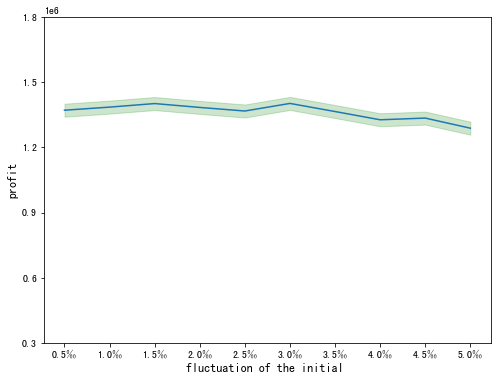

In [50]:
# from matplotlib.pyplot import MultipleLocator
_=plt.figure(figsize=(8,6))
plt.plot(temp)
plt.fill_between(list(range(10)),np.array(temp)-0.03e6,np.array(temp)+0.03e6,color='g',alpha=0.2)
yticks=[0.3e6,0.6e6,0.9e6,1.2e6,1.5e6,1.8e6]
xticks=list(range(10))
xlabel=[f'{i*100:.1f}‰' for i in [0.005,0.01,0.015,0.02,0.025,0.03,0.035,0.040,0.045,0.05]]
plt.yticks(yticks)
plt.xticks(xticks,xlabel)
plt.xlabel('fluctuation of the initial ',fontsize=12)
plt.ylabel('profit',fontsize=12)
plt.savefig('sen.jpg')

In [51]:
pd.DataFrame(temp).to_csv('sen_mean.csv',header=None)